## COVID-19 Daily Analysis Table and Heat Map 
  - source:  official data collected by John Hopkins, Stats by Coutry,  https://github.com/CSSEGISandData/
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [15]:
try:  ## SUMMARY IN THIS TABLE    %store df9
    display(df9.transpose().tail(2) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,France,Italy,Spain,Belgium,Brazil,Netherlands,Sweden,Turkey,Germany,Iran,Canada,Indonesia,Canada,Ireland
4/13/20,1509,717,574,566,547,303,105,86,20,98,172,111,32,26,17,31
4/14/20,2303,778,762,602,300,254,204,122,114,107,100,98,75,60,43,41


### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.0 MB/s eta 0:00:01    |█████████████                   | 4.1 MB 3.0 MB/s eta 0:00:03
     |████████████████████████████████| 215 kB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 38.8 MB/s eta 0:00:01    |██████████████▉                 | 9.3 MB 38.8 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 35.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 43.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 38.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.5 MB/s  eta 0:00:01


In [3]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   2009      0 --:--:-- --:--:-- --:--:--  2009
100 55792  100 55792    0     0   280k      0 --:--:-- --:--:-- --:--:--  972k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
Country/Region,,,,,,,,,,,,,
US,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463,22020,23529,25832
Italy,13915,14681,15362,15887,16523,17127,17669,18279,18849,19468,19899,20465,21067
Spain,10348,11198,11947,12641,13341,14045,14792,15447,16081,16606,17209,17756,18056
France,5387,6507,7560,8078,8911,10328,10869,12210,13197,13832,14393,14967,15729
United Kingdom,2921,3605,4313,4934,5373,6159,7097,7978,8958,9875,10612,11329,12107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diamond Princess,11,11,11,11,11,11,11,11,11,11,11,11,12
Cyprus,10,11,11,9,9,9,9,10,10,10,11,12,12
Nigeria,2,4,4,5,5,6,6,7,7,10,10,10,11


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
Country/Region,,,,,,,,,,,,
US,1161,1320,1212,1164,1939,1973,1783,2108,1877,1557,1509,2303
United Kingdom,684,708,621,439,786,938,881,980,917,737,717,778
France,1120,1053,518,833,1417,541,1341,987,635,561,574,762
Italy,766,681,525,636,604,542,610,570,619,431,566,602
Spain,850,749,694,700,704,747,655,634,525,603,547,300
Belgium,132,140,164,185,403,205,283,496,327,254,303,254
Brazil,35,86,41,78,122,133,131,107,67,99,105,204
Netherlands,148,164,115,101,234,147,148,115,132,94,86,122
Sweden,50,15,28,76,114,96,106,77,17,12,20,114


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1161,1320,1212,1164,1939,1973,1783,2108,1877,1557,1509,2303"
data-datasets="684,708,621,439,786,938,881,980,917,737,717,778"
data-datasets="1120,1053,518,833,1417,541,1341,987,635,561,574,762"
data-datasets="766,681,525,636,604,542,610,570,619,431,566,602"
data-datasets="850,749,694,700,704,747,655,634,525,603,547,300"
data-datasets="132,140,164,185,403,205,283,496,327,254,303,254"
data-datasets="35,86,41,78,122,133,131,107,67,99,105,204"
data-datasets="148,164,115,101,234,147,148,115,132,94,86,122"
data-datasets="50,15,28,76,114,96,106,77,17,12,20,114"
data-datasets="69,76,73,75,76,87,96,98,95,97,98,107"
data-datasets="168,169,140,226,206,333,258,160,-31,286,172,100"
data-datasets="134,158,151,136,133,121,117,122,125,117,111,98"
data-datasets="25,0,14,46,29,25,41,25,48,39,32,75"
data-datasets="11,10,7,11,12,19,40,26,21,46,26,60"
data-datasets="14,27,25,31,3,0,47,22,31,21,17,43"
data-datasets="22,17,21,16

In [9]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Australia,Austria,Azerbaijan,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,US,Canada,Mali
4/3/20,0,1,19,1,3,0,2,2,10,0,...,4,4,69,5,1,1,684,1161,0,0
4/4/20,1,3,25,1,4,0,0,1,18,0,...,1,0,76,5,1,1,708,1320,0,0
4/5/20,0,0,22,1,1,0,4,0,18,2,...,3,4,73,5,0,1,621,1212,0,2
4/6/20,4,1,21,3,4,1,2,2,16,0,...,3,0,75,1,1,1,439,1164,0,0
4/7/20,3,1,20,1,8,0,3,1,23,1,...,1,1,76,7,1,0,786,1939,0,0
4/8/20,0,0,12,1,7,1,0,1,30,0,...,3,1,87,7,0,1,938,1973,0,2
4/9/20,1,1,30,2,9,1,0,0,22,1,...,2,1,96,5,2,0,881,1783,0,0
4/10/20,0,0,21,1,10,2,1,1,24,1,...,1,0,98,12,2,1,980,2108,0,0
4/11/20,3,0,19,0,1,1,1,1,18,1,...,2,3,95,4,4,0,917,1877,0,0
4/12/20,0,0,18,3,7,0,1,0,13,0,...,3,3,97,10,2,0,737,1557,0,2


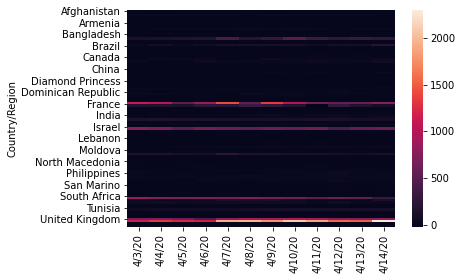

In [10]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

94 18.833333333333332


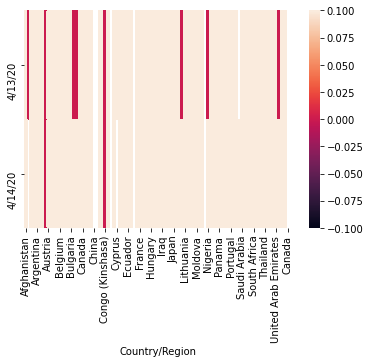

In [11]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [12]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/14/20
Country/Region,
Diamond Princess,11.000000
United Kingdom,4.888889
Cameroon,3.666667
Mali,3.300000
Croatia,2.869565
...,...
China,0.000000
Iraq,0.000000
Luxembourg,-0.611111


In [13]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [14]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.8 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=b26c3cc4a84d9759a9fafbac0415daf4628bed43521da19deabfb29962a4a803
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
